# UNIVERSIDAD POLITECNICA SALESIANA



## Alumna: Narcisa Araujo


## ExamenFinal-SE




### Enunciado:

Se desea generar un sistema de recomendación de películas, por tal motivo se va a utiliza una base de datos orientada a grafos y un control de lógica difusa para clasificar el riesgo financiero, el mismo que sera ingresado como atributo del cliente en el sistema recomendador, para lograr esto se describe los pasos a seguir:


1)	Evaluar el riesgo financiero de sus clientes que requieren la recomendación de películas. Para evaluar el riesgo financiero se toma en cuenta la edad del asegurado y su porcentaje de manejo durante el año. Para ello se tiene las siguientes reglas y la función de pertinencia. El proceso seguir se describe en  el siguiente link: https://medium.com/@javierdiazarca/l%C3%B3gica-difusa-ejercicios-propuestos-b99603ef1bc0.

2)	Generar números aleatorios para la edad y el porcentaje de manejo con el objetivo de generar al menos 100 personas y ademas incluir el listado de películas vistas y el valor del rating de cada película. Al menos 20 películas y un total de nodos de al menos 250 nodos.

3)	Con estos datos aplicar el algoritmo de KNN y Similitud de Coseno para la recomendación de películas, seguir el siguiente tutorial: https://neo4j.com/graphgist/movie-recommendations-with-k-nearest-neighbors-and-cosine-similarity.

4)	Finalmente realizar alguna interfaz para poder acceder a la recomendación e ingreso de datos y resultados de los procesos.


In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from random import randint, uniform,random


# Nuevos objetos Antecedente / Consecuentes contienen variables de universo y 
# funciones de pertenencia.
edad = ctrl.Antecedent(np.arange(18, 71, 1), 'edad')
manejo = ctrl.Antecedent(np.arange(0, 101, 1), 'manejo')
riesgo = ctrl.Consequent(np.arange(0, 101, 1), 'riesgo')

# Población función Auto-pertenencia es posible con .automf (3, 5 o 7) 
#calidad.automf(3)
#servicio.automf(3)

riesgo['bajo'] = fuzz.trimf(riesgo.universe, [0, 10, 20])
riesgo['medio'] = fuzz.trimf(riesgo.universe, [10, 30, 45])
riesgo['alto'] = fuzz.trimf(riesgo.universe, [40, 55, 100])

manejo['bajo'] = fuzz.trimf(manejo.universe, [0, 10, 20])
manejo['medio'] = fuzz.trimf(manejo.universe, [10, 40, 60])
manejo['alto'] = fuzz.trimf(manejo.universe, [50, 70, 100])

edad['joven'] = fuzz.trimf(edad.universe, [18, 25, 30])
edad['adulto'] = fuzz.trimf(edad.universe, [20, 35, 50])
edad['mayor'] = fuzz.trimf(edad.universe, [40, 60, 70])

C:\Users\narcisa\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


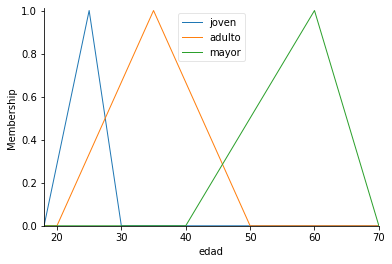

In [2]:
edad.view()

C:\Users\narcisa\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


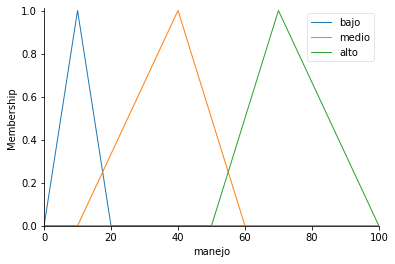

In [3]:
manejo.view()

In [ ]:
riesgo.view()

In [5]:
regla1 = ctrl.Rule(manejo['bajo'] and edad['joven'], riesgo['medio'])
regla2 = ctrl.Rule(manejo['medio'] and edad['joven'], riesgo['alto'])
regla3 = ctrl.Rule(manejo['alto'] and edad['joven'], riesgo['alto'])

regla4 = ctrl.Rule(manejo['bajo'] and edad['adulto'], riesgo['bajo'])
regla5 = ctrl.Rule(manejo['medio'] and edad['adulto'], riesgo['medio'])
regla6 = ctrl.Rule(manejo['alto'] and edad['adulto'], riesgo['alto'])

regla7 = ctrl.Rule(manejo['bajo'] and edad['mayor'], riesgo['medio'])
regla8 = ctrl.Rule(manejo['medio'] and edad['mayor'], riesgo['alto'])
regla9 = ctrl.Rule(manejo['alto'] and edad['mayor'], riesgo['alto'])

regla10 = ctrl.Rule(edad['joven'] and manejo['bajo'], riesgo['medio'])
regla11 = ctrl.Rule(edad['joven'] and manejo['medio'], riesgo['alto'])
regla12 = ctrl.Rule(edad['joven'] and manejo['alto'], riesgo['alto'])

regla13 = ctrl.Rule(edad['adulto'] and manejo['bajo'], riesgo['bajo'])
regla14 = ctrl.Rule(edad['adulto'] and manejo['medio'], riesgo['medio'])
regla15 = ctrl.Rule(edad['adulto'] and manejo['alto'], riesgo['alto'])

regla16 = ctrl.Rule(edad['mayor'] and manejo['bajo'], riesgo['medio'])
regla17 = ctrl.Rule(edad['mayor'] and manejo['medio'], riesgo['alto'])
regla18 = ctrl.Rule(edad['mayor'] and manejo['alto'], riesgo['alto'])


In [6]:
riesgo_ctrl = ctrl.ControlSystem([regla1,regla2,regla3,regla4,regla5,regla6,regla7,regla8,regla9
                                 ,regla10,regla11,regla12,regla13,regla14,regla15,regla16,regla17,regla18])

In [7]:
riesgos = ctrl.ControlSystemSimulation(riesgo_ctrl)


In [ ]:
riesgos.input['manejo'] = 50
riesgos.input['edad'] = 29

riesgos.compute()

In [ ]:
print (riesgos.output['riesgo'])
riesgo.view(sim=riesgos)

In [12]:
from neo4j import GraphDatabase

class Neo4jService(object):

    def __init__(self, uri, user, password):
        self._driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        self._driver.close()
    
    def crear_nodo(self, tx, nombre1,edad1,porcentaje1,riesgo1):
        tx.run("CREATE (persona:Persona {nombre:$nombre1, edad:$edad1 ,porcentaje:$porcentaje1,riesgo=$riesgo1})",
               nombre1=nombre1, edad1=edad1,porcentaje1=porcentaje1,riesgo1=riesgo1)
        
    #def crear_pelicula(self, tx, nombre,riesgo):
       # tx.run("CREATE (pelicula:Pelicula {nombre: $nombre, riesgo: $riesgo})",nombre=nombre, riesgo=riesgo)
        
    def recomendacion(self,tx,reco):
        result = tx.run("MATCH    (b:Persona)-[r:RATED]->(m:Pelicula), (b)-[s:SIMILARITY]-(a:Persona {name:$recomedar})\n"
                        "WHERE    NOT((a)-[:RATED]->(m))\n"
                        "WITH     m, s.similarity AS similarity, r.rating AS rating\n"
                        "ORDER BY m.name, similarity DESC\n"
                        "WITH     m.name AS pelicula, COLLECT(rating)[0..3] AS ratings\n"
                        "WITH     pelicula, REDUCE(s = 0, i IN ratings | s + i)*1.0/20 AS reco\n"
                        "ORDER BY reco DESC\n"
                        "RETURN   pelicula AS Pelicula, reco AS Recommendation",recomendar=reco)
        for record in result:
            r1=(record["Persona"])
            r2=(record["Pelicula"])
            r3=(record["similarity"])
            if r1 == nombre.get() or r2==nombre.get():
                resultado.insert(tk.END, "\nEl Nodo "+r2+" tiene mas similitud con el nodo "+r1)
                
            
   # def recomendacionPer(self,tx):
    #    result = tx.run("CALL gds.beta.knn.stream('Recomendacion', {\n"
     #                       "topK: 1,\n"
      #                      "nodeWeightProperty: 'riesgo',\n"
       #                     "randomSeed: 42,\n"
        #                    "concurrency: 1,\n"
         #                   "sampleRate: 1.0,\n"
          #                  "deltaThreshold: 0.0\n"
           #             "})\n"
            #            "YIELD node1, node2, similarity\n"
          #   3           "RETURN gds.util.asNode(node1).nombre AS Persona, gds.util.asNode(node2).nombre AS Pelicula, similarity")
       # for record in result:
        #    r1=(record["Persona"])
         #   r2=(record["Pelicula"])
          #  r3=(record["similarity"])
           # print ("El nodo "+r1+" tiene mas relacion con el nodo "+r2+" con una similitud de "+str(r3))

In [ ]:
porcen=(random.randrange(10, 100))/100
edadn=random.randrange(10, 80)

In [13]:
p=1
neo4j = Neo4jService('bolt://localhost:7687', 'neo4j', 'egfa2209')
with neo4j._driver.session() as session:
        riesgos.input['edad'] = randint(18,70)
        riesgos.input['manejo'] = randint(1,100)
        riesgos.compute()
        s=float(riesgos.output['riesgo'])
        session.write_transaction(neo4j.crear_nodo , nombre.get(),s)
        p=p+1
    

In [14]:
neo4j = Neo4jService('bolt://localhost:7687', 'neo4j', 'egfa2209')
with neo4j._driver.session() as session:
    for i in peliculas:
        peli=i
        riesgo = float(randint(1,100))
        session.write_transaction(neo4j.crear_pelicula , peli,riesgo)

In [21]:
from tkinter import *
from tkinter import ttk
from tkinter import messagebox
import tkinter as tk

raiz = Tk()


def clearTextInput():
    resultado.delete("1.0","end")
        
def crear():
    neo4j = Neo4jService('bolt://localhost:7687', 'neo4j', 'egfa2209')
    with neo4j._driver.session() as session:
        session.write_transaction(neo4j.crear_nodo , nombre.get(),float(dif.get()))
        
def buscar():
    neo4j = Neo4jService('bolt://localhost:7687', 'neo4j', 'egfa2209')
    with neo4j._driver.session() as session:
        session.read_transaction(neo4j.recomendacion)

def logica():
    riesgos.input['manejo'] = float(manejo.get())
    riesgos.input['edad'] = float(edad.get())
    riesgos.compute()
    dif.insert (tk.END, str(riesgos.output['riesgo']))
    print(riesgos.output['riesgo'])
    riesgo.view(sim=riesgos)
    


raiz.geometry('600x525')  # anchura x altura

raiz.title('Examen SE')
Label(raiz, text="Examen SE").place(x=230, y=0)

Label(raiz, text="Nombre del la Persona:").place(x=130, y=50)

nombre=ttk.Entry(raiz)
nombre.place(x=267, y=50)

Label(raiz, text="Edad:").place(x=130, y=90)

edad=ttk.Entry(raiz)
edad.place(x=267, y=90)

Label(raiz, text="% Manejo:").place(x=130, y=130)

manejo=ttk.Entry(raiz)
manejo.place(x=267, y=130)

Label(raiz, text="Logica Difusa:").place(x=200, y=500)

dif=ttk.Entry(raiz)
dif.place(x=300, y=500)


ttk.Button(raiz, text='Lógica Difusa', command=logica).place(x=150, y=165)
ttk.Button(raiz, text='Guardar',command=crear).place(x=250, y=165)
ttk.Button(raiz, text='Recomendacion',command=buscar).place(x=350, y=165)

resultado = Text(raiz)
resultado.place(x = 10, y=200, width=580, height=275)

raiz.mainloop()

In [16]:
neo4j = Neo4jService('bolt://localhost:7687', 'neo4j', 'egfa2209')
with neo4j._driver.session() as session:
    session.read_transaction(neo4j.recomendacionPer)

El nodo Daniela Lujan tiene mas relacion con el nodo Boris Romo con una similitud de 0.7063447419063854
El nodo David Campos tiene mas relacion con el nodo Jose Perez con una similitud de 1.0
El nodo Camilo Castro tiene mas relacion con el nodo Liliana Faican con una similitud de 1.0
El nodo David Cepeda tiene mas relacion con el nodo Mariela Andrade con una similitud de 0.9505181347150032
El nodo Ismael Castillo tiene mas relacion con el nodo Carmen Lopez con una similitud de 1.0
El nodo Raquel Trelles tiene mas relacion con el nodo Maite Cordero con una similitud de 1.0
El nodo Diego Faican tiene mas relacion con el nodo Camilo Castro con una similitud de 0.9870478557904571
El nodo Liliana Faican tiene mas relacion con el nodo Camilo Castro con una similitud de 1.0
El nodo Catalina Faican tiene mas relacion con el nodo Abel Delgado con una similitud de 0.922614166240905
El nodo Santiago Borja tiene mas relacion con el nodo Roberto Garcia con una similitud de 1.0
El nodo Rosalia Vega 